In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# 데이터 로드
housing = fetch_california_housing()
X = housing.data
feature_names = housing.feature_names

# 데이터프레임 생성
df = pd.DataFrame(X, columns=feature_names)

# 1. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 2. PCA 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [5]:
# 3. 설명된 분산 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [6]:
# 4. 시각화
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Explained Variance Ratio')

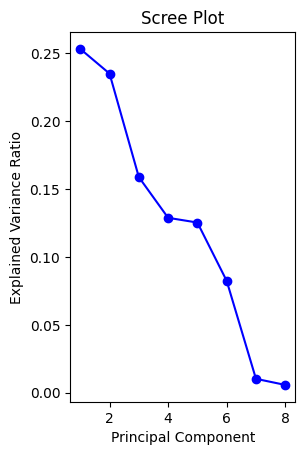

In [7]:
# 4-1. 스크리 플롯
plt.subplot(121)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

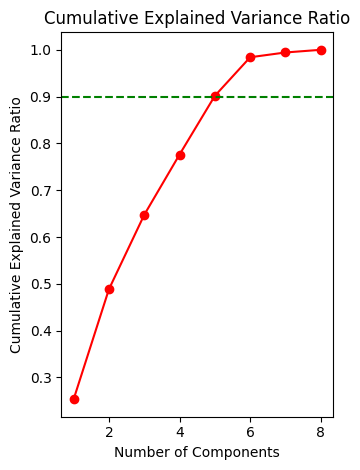

In [8]:
# 4-2. 누적 분산 비율
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

In [9]:
# 5. 주성분 적재량(Component loadings) 확인
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(feature_names))],
    index=feature_names
)

print("\nPrincipal Component Loadings:")
print(loadings)


Principal Component Loadings:
                 PC1       PC2       PC3       PC4       PC5       PC6  \
MedInc      0.077462  0.229879  0.218222  0.885294 -0.002603  0.149818   
HouseAge    0.007318 -0.260786 -0.627551  0.109898  0.222936  0.683931   
AveRooms    0.439142  0.546687 -0.063999  0.046402  0.029852  0.095054   
AveBedrms   0.399996  0.501850 -0.191848 -0.338144  0.050922  0.086854   
Population -0.171783  0.100626  0.650375 -0.283207  0.008078  0.675226   
AveOccup   -0.014644  0.002621  0.157727 -0.004918  0.972669 -0.169410   
Latitude    0.568364 -0.374011  0.192600 -0.062214 -0.022761 -0.042069   
Longitude  -0.536974  0.422387 -0.180824 -0.059846  0.011807 -0.082551   

                 PC7       PC8  
MedInc      0.169238  0.242271  
HouseAge   -0.081035  0.044846  
AveRooms   -0.530662 -0.458814  
AveBedrms   0.531566  0.379875  
Population -0.031676  0.013170  
AveOccup    0.003246 -0.008959  
Latitude   -0.431797  0.554415  
Longitude  -0.461698  0.526165  


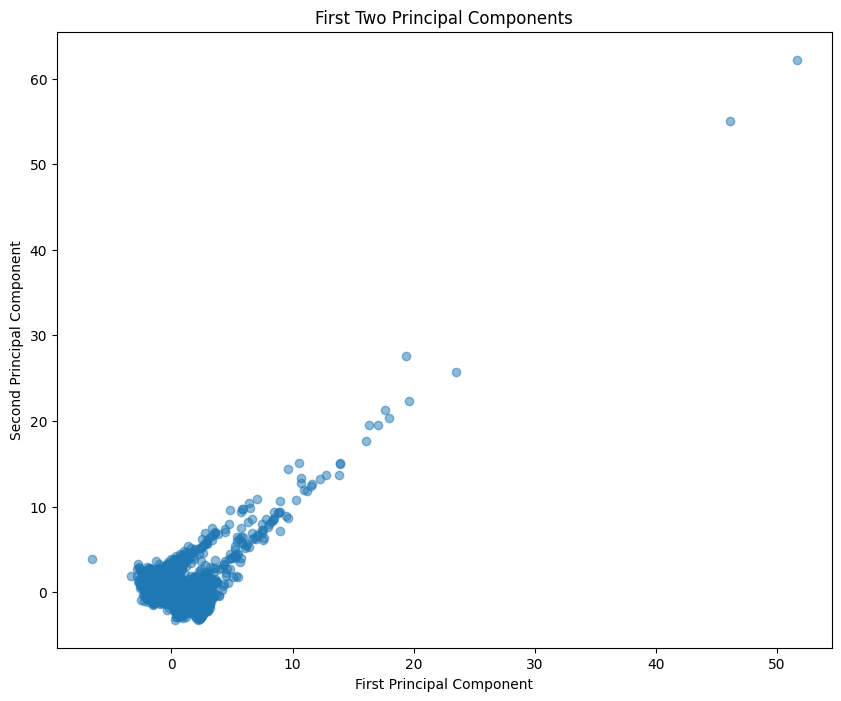

In [10]:
# 6. 첫 두 개의 주성분으로 산점도 그리기
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [11]:
# 7. 결과 요약
print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")


Explained Variance Ratio by Component:
PC1: 0.2534 (0.2534 cumulative)
PC2: 0.2352 (0.4885 cumulative)
PC3: 0.1589 (0.6474 cumulative)
PC4: 0.1289 (0.7763 cumulative)
PC5: 0.1254 (0.9017 cumulative)
PC6: 0.0824 (0.9841 cumulative)
PC7: 0.0102 (0.9943 cumulative)
PC8: 0.0057 (1.0000 cumulative)
